In [1]:
import sys
import torch
import ot

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../lib")
from distributions import sampleWrappedNormal
from utils_hyperbolic import *
from hsw import hyper_sliced_wasserstein
from hhsw import horo_hyper_sliced_wasserstein_lorentz, horo_hyper_sliced_wasserstein_poincare
from sw import sliced_wasserstein
from utility import *

device = "cuda" if torch.cuda.is_available() else "cpu"

## Lorentz Model

### low dimension

In [2]:
mu0 = torch.tensor([1,0,0,0], dtype=torch.float64, device=device)
Sigma0 = torch.eye(3, dtype=torch.float, device=device)


n_try = 10
N = [100,1000,10000,100000]

In [3]:
L_sfw = np.zeros((len(N), n_try))
L_iprsfw_geo = np.zeros((len(N), n_try))
L_iprsfw_horo = np.zeros((len(N), n_try))
i = 0


for n in N:
    for k in range(n_try):
        x0 = sampleWrappedNormal(mu0, Sigma0, n)
        x1 = sampleWrappedNormal(mu0, Sigma0, n)


        distance = SFW(x0,x1,hyperbolic_model="Lorentz",spf_curve="Mm_l")
        L_sfw[i,k] = distance.item()**2

        distance = IPRSFW(x0,x1,hyperbolic_model="Lorentz",spf_curve="Mm_l",projection_kind="geodesic", q=2, nslice=50, p=2, eps=1e-5, device=device)
        L_iprsfw_geo[i,k] = distance.item()**2

        distance = IPRSFW(x0,x1,hyperbolic_model="Lorentz",spf_curve="Mm_l",projection_kind="horospherical", q=2, nslice=50, p=2, eps=1e-5, device=device)
        L_iprsfw_horo[i,k] = distance.item()**2
    
    i += 1
    print(i)

1
2
3
4


In [4]:
# plt.figure(dpi=200)
L_sfw_m = np.mean(L_sfw,1)
L_iprsfw_geo_m = np.mean(L_iprsfw_geo,1)
L_iprsfw_horo_m = np.mean(L_iprsfw_horo,1)


# plt.plot(np.log10(np.array(N)),np.log10(L_sfw_m),c="r",label="SFW",marker="*")
# plt.plot(np.log10(np.array(N)),np.log10(L_iprsfw_geo_m),c="darkred",label=r"$SFW^{IPR}(geo)$",marker="o")
# plt.plot(np.log10(np.array(N)),np.log10(L_iprsfw_horo_m),c="orange",label=r"$SFW^{IPR}(horo)$",marker="s")
# plt.legend()
# plt.xlabel(r"$\log_{10}(n)$", fontsize=20)
# plt.ylabel(r"$\log_{10}(distances)$", fontsize=20)

# plt.xticks([2,3,4,5])


# plt.grid(True)

# plt.savefig("./results/curse.pdf", format="pdf", bbox_inches="tight")

### high dimension

In [5]:
mu0 = torch.tensor(np.zeros(20), dtype=torch.float64, device=device)
mu0[0] = 1
Sigma0 = torch.eye(19, dtype=torch.float, device=device)


n_try = 10
N = [100,1000,10000,100000]

In [6]:
L_hsw = np.zeros((len(N), n_try))
L_hhsw = np.zeros((len(N), n_try))
L_sw = np.zeros((len(N), n_try))
L_sfw = np.zeros((len(N), n_try))
L_iprsfw_geo = np.zeros((len(N), n_try))
L_iprsfw_horo = np.zeros((len(N), n_try))
i = 0


for n in N:
    for k in range(n_try):
        x0 = sampleWrappedNormal(mu0, Sigma0, n)
        x1 = sampleWrappedNormal(mu0, Sigma0, n)


        distance = SFW(x0,x1,hyperbolic_model="Lorentz",spf_curve="Mm_l")
        L_sfw[i,k] = distance.item()**2

        distance = IPRSFW(x0,x1,hyperbolic_model="Lorentz",spf_curve="Mm_l",projection_kind="geodesic", q=2, nslice=50, p=2, eps=1e-5, device=device)
        L_iprsfw_geo[i,k] = distance.item()**2

        distance = IPRSFW(x0,x1,hyperbolic_model="Lorentz",spf_curve="Mm_l",projection_kind="horospherical", q=2, nslice=50, p=2, eps=1e-5, device=device)
        L_iprsfw_horo[i,k] = distance.item()**2
    
    i += 1
    print(i)

1
2
3
4


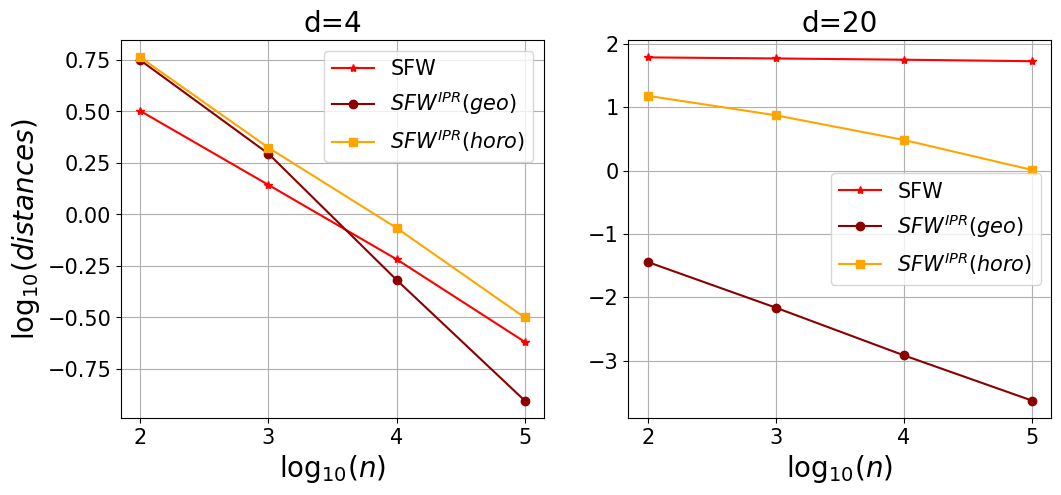

In [8]:
plt.figure(dpi=100,figsize=(12,5))


plt.subplot(1,2,1)
plt.title("d=4",fontsize=20)
plt.plot(np.log10(np.array(N)),np.log10(L_sfw_m),c="r",label="SFW",marker="*")
plt.plot(np.log10(np.array(N)),np.log10(L_iprsfw_geo_m),c="darkred",label=r"$SFW^{IPR}(geo)$",marker="o")
plt.plot(np.log10(np.array(N)),np.log10(L_iprsfw_horo_m),c="orange",label=r"$SFW^{IPR}(horo)$",marker="s")
plt.legend(fontsize=15)
plt.xlabel(r"$\log_{10}(n)$", fontsize=20)
plt.ylabel(r"$\log_{10}(distances)$", fontsize=20)
plt.xticks([2,3,4,5],fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)



plt.subplot(1,2,2)
L_sfw_mh = np.mean(L_sfw,1)
L_iprsfw_geo_mh = np.mean(L_iprsfw_geo,1)
L_iprsfw_horo_mh = np.mean(L_iprsfw_horo,1)
plt.plot(np.log10(np.array(N)),np.log10(L_sfw_mh),c="r",label="SFW",marker="*")
plt.plot(np.log10(np.array(N)),np.log10(L_iprsfw_geo_mh),c="darkred",label=r"$SFW^{IPR}(geo)$",marker="o")
plt.plot(np.log10(np.array(N)),np.log10(L_iprsfw_horo_mh),c="orange",label=r"$SFW^{IPR}(horo)$",marker="s")
plt.legend(fontsize=15)
plt.title("d=20",fontsize=20)
plt.xlabel(r"$\log_{10}(n)$", fontsize=20)
plt.xticks([2,3,4,5],fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)

# plt.savefig("./curse.pdf", format="pdf", bbox_inches="tight")